We imagine a graph with a degree distribution made up as
$$P(k') = p_1 \delta(k_1 - k') + p_2 \delta(k_2 - k')$$
, i.e. only two degrees are allowed, one lower (1) and one higher (2). This means that
$$\bar{k} = p_1 k_1 + p_2 k_2$$
and
$$Var[k] = p_1 k_1^2 + p_2 k_2^2 - \bar{k}^2$$

In order to find the death and birth rates, we need to find the distribution of $\tilde{y}_k$, i.e. the value of $y$ as seen by a given node of degree $k$.

Now, for a node of degree $k'$, it will have $k_1'$ edges to other nodes of degree $k_1$, and $k_2' = k' - k_1'$ edges to other nodes of degree $k_2$. $k_1'$ is distributed as
$$k_1' \sim Binom(k,p_{1|k})$$
where $p_{k''|k}$ is the neighbor degree distribution, and $p_{1|k}$ is the probability that a neighboring node has the lower degree $k_1$. We will assume that $p_{k''|k} = \frac{k'' p_{k''}}{\bar{k}}$

Given $k_1'$, the number of infecteds seen among those edges leading to other nodes of degree $k_1$ is given by
$$i_{1|k} \sim Binom(k_1',y_1)$$
$$i_{2|k} \sim Binom(k - k_1',y_2)$$
where $y_1 = n_1/N_1$ is the fraction of lower degree nodes that are currently infected.

Thus we have
$\tilde{y}_k = \frac{i_{1|k} + i_{2|k}}{k_1' + k_2'} =\frac{i_{1|k} + i_{2|k}}{k} $
We calculate the expectations of $\tilde{y}_k$ by first computing the expectations conditioned on $k_1'$, and then taking expectations over the distribution of $k_1'$ (Law of Total Expectation).

The expectations of $k_1'$ and $k_1'^2$ are 
$$E[k_1'] = k p_{1|k}$$
$$E[k_1'^2] = k^2 p_{1|k}^2 + k p_{1|k} (1 - p_{1|k})$$


We thus obtain
$$E[i_{1|k} | k_1'] = k_1' y_1$$
$$E[i_{1|k}] = k p_{1|k} y_1$$
and therefore
$$E[\tilde{y}_k] = p_{1|k} y_1 + p_{2|k} y_2$$

Similarly, we have
$$E[\tilde{y}^2_k] =  \frac{1}{k^2} \left( k_1'^2 y_1^2 + k_1' y_1 (1- y_1) + 2 y_1 y_2 (k k_1' - k_1'^2) + (k^2 - 2 k k_1' + k_1'^2) y_2^2 + (k - k_1') y_2 (1 - y_2)  \right)$$
where we replace all instances of $k_1'$ and $k_1'^2$ with their expectations to obtain the final expression as a function of only $y_{1/2}$ and $p_{1/2 | k}$.


In [1]:
push!(LOAD_PATH, pwd()*"/..")
using LightGraphs, Epidemics, GraphGeneration,IM, TwoDegree
using GraphGeneration
using NLsolve, Dierckx
using PyPlot, Distributions
using DegreeDistribution

In [2]:
N = 400
kbar = 10
sigmak = 15
# tdp = compute_two_degree_params(kbar,sigmak)
# println(tdp)
# compute_k_sigma_k(tdp)
g = graph_from_two_degree_distribution(N,kbar,sigmak)
# g = graph_from_gamma_distribution(N,kbar,sigmak)
dg = degree(g)
println(mean(dg), " " , std(dg))
# println(dg)

8.265 13.343909652423081


In [3]:
p_1 = 0.5
p_2 = 0.5
k_1 = 5
k_2 = 21
tdp = TwoDegreeParams(k_1,k_2,p_1,p_2)
N = 99

99

In [4]:
g = graph_from_two_degree_distribution(tdp,40)
p_k = get_p_k_two_degree(tdp)
degrees = get_degrees_from_p_k(p_k,N)

LoadError: UndefVarError: get_degrees_from_p_k not defined

## Run a well mixed simulation keeping track of $n_1$ and $n_2$

In [14]:
N = 2000
k = 10
sigmak = 20

trials = 100000

tdp = compute_two_degree_params(k,sigmak)


y_n = 0.1
c_r = 0.3#0.18
n_n = y_n*N#10#80#y_n*N
beta = 4.0/(c_r*n_n)
alpha = (N*beta)/n_n
# alpha,beta = 0.0,0.0
println("N=$N, alpha = $alpha, beta = $beta")

im = InfectionModel(x -> 1 + alpha*x , x -> 1 + beta);

yy,pp,tuples = get_p_reach_well_mixed_two_degree_simulation(alpha,beta,N,tdp,trials)
y_arr,y1_arr,y2_arr = compute_y1_y2_vs_y(tuples,N)

# tuples = []

# for i = 1:100000
#     _,_,tup = get_p_reach_well_mixed_two_degree_simulation(alpha,beta,N,tdp,1)
#     push!(tuples,tup[1])
# end
# y_arr,y1_arr,y2_arr = compute_y1_y2_vs_y(tuples,N)
    
println(length(tuples))
println(tdp)

N=2000, alpha = 0.6666666666666667, beta = 0.06666666666666667
20824158
GraphGeneration.TwoDegreeParams(3,67,0.890625,0.109375)


In [33]:
min_degree= 3
degr_distr = get_p_k_two_degree(compute_two_degree_params(k,sigmak,min_degree))
p_k,p_k_neighbor,mean_k = get_p_k_as_vec(degr_distr,N)
y_desired_range = logspace(log10(1/N),0,5)
y_1_range = zeros(y_desired_range)
y_2_range = zeros(y_desired_range)
for (i,y_desired_curr) in enumerate(y_desired_range)
    y_k_curr = get_y_k_equilibrium(y_desired_curr,N,p_k,p_k_neighbor,alpha,beta)[1:end-1]
    y_k_curr = y_k_curr[p_k .> 0]
    y_1_range[i] = y_k_curr[1]
    y_2_range[i] = y_k_curr[2]
end

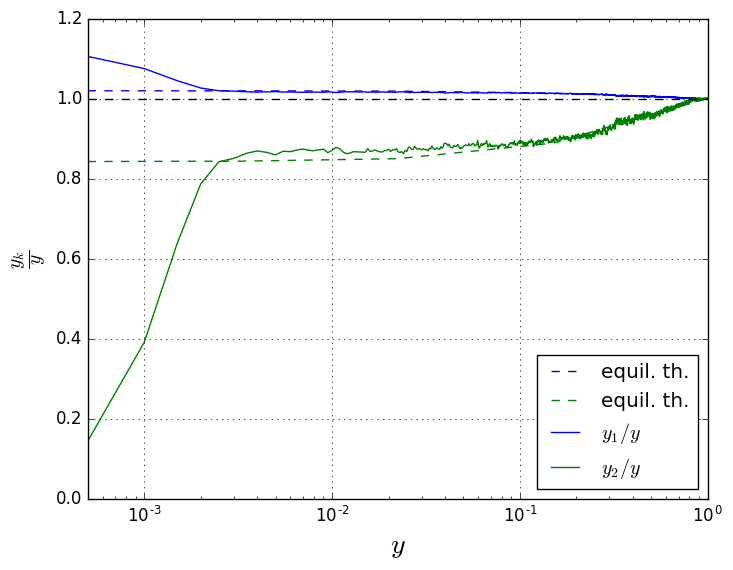

In [80]:

semilogx(y_desired_range,y_1_range./y_desired_range,"--b",label="equil. th.")
semilogx(y_desired_range,y_2_range./y_desired_range,"--g",label="equil. th.")

# semilogx(y_arr,y_1_fn(y_arr)./y_arr,"b",label=L"y_1/y")
# semilogx(y_arr,y_2_fn(y_arr)./y_arr,"b",label=L"y_1/y")

semilogx(y_arr,y1_arr./y_arr,"b",label=L"y_1/y")
plot(y_arr,y2_arr./y_arr,"g",label=L"y_2/y")
axhline(1,color="k",linestyle="--")
legend(loc="best")
xlabel(L"y",size=20)
ylabel(L"\frac{y_{k}}{y}",size=20)
xlim([1/N,1])
# ylim([0.7,1.3])
# axvline(3e-3)
grid()

In [28]:
length(y_desired_range),length(y_2_range)

(100,5)

In [54]:

function get_p_reach_from_delta_y(y_desired_range,delta_y_plus,delta_y_minus)
    s = delta_y_plus - delta_y_minus
    splus = delta_y_plus + delta_y_minus
    
    interpolation_order = 3
    s_fn(x) = evaluate(Spline1D(y_desired_range,s,k=interpolation_order,bc="extrapolate"),x)
    splus_fn(x) = evaluate(Spline1D(y_desired_range,splus,k=interpolation_order,bc="extrapolate"),x)
    
    dx = 1/N
    yy = collect(1/N:dx:1)
    pp = P_reach_fast(s_fn,splus_fn,N,1.0/N,yy)
    return yy,pp
end

function get_mean_y_k_squared_mod(k,y1,y2,tdp)
    p1k,p2k = TwoDegree.get_p_neighbor(tdp)
    mean_k1sq = k^2*p1k^2 + k*p1k*(1-p1k)
    mean_k1 = k*p1k
    denom = mean_k1sq*y1^2 + mean_k1*y1*(1-y1) +
    2*(mean_k1*k - mean_k1sq)*y1*y2 +
    (k^2-2*mean_k1*k + mean_k1sq)*y2^2+
    (k-mean_k1)*y2*(1-y2)
    return denom/k^2
end

function get_delta_y_plus_mod(y_k,p_k,mean_y_k,N,alpha,tdp)
    k_range = get_k_range(N)
    ret = 0
    for k in k_range
        idx1,idx2 = find(p_k .> 0)
        y1 = y_k[idx1]
        y2 = y_k[idx2]
        mean_y_k_squared = get_mean_y_k_squared_mod(k,y1,y2,tdp)
        ret += get_delta_y_k_plus(y_k,k,mean_y_k,mean_y_k_squared,alpha)*p_k[k]
    end
    return ret
end


get_delta_y_plus_mod (generic function with 1 method)

In [78]:
c_r = 0.3
N = 2000
y_n = 0.1

n_n = Int(N*y_n)#y_n*N
beta = 4.0/(c_r*n_n)
alpha = (N*beta)/n_n

k = 10
sigma_k = 20
min_degree = 3

tdp = compute_two_degree_params(k,sigma_k,min_degree)
degr_distr = get_p_k_two_degree(tdp)
p_k,p_k_neighbor,mean_k = get_p_k_as_vec(degr_distr,N)

y_desired_arr = logspace(log10(1/N),log10(1),100) 
delta_y_plus = similar(y_desired_arr)
delta_y_plus_mod = similar(y_desired_arr)
delta_y_minus = similar(y_desired_arr)
y_bar = similar(y_desired_arr)
y_local = similar(y_desired_arr)


interpolation_order = 3
y_1_fn(x) = evaluate(Spline1D(y_arr,y1_arr,k=interpolation_order,bc="extrapolate"),x)
y_2_fn(x) = evaluate(Spline1D(y_arr,y2_arr,k=interpolation_order,bc="extrapolate"),x)
 
for (i,y_desired) in enumerate(y_desired_arr)
    println(i)
    y_k = y_desired*ones(N)
    y_k[1:end-1][p_k .> 0][1] = y_1_fn(y_desired)
    y_k[1:end-1][p_k .> 0][2] = y_2_fn(y_desired)
#     y_k = get_y_k_equilibrium(y_desired,N,p_k,p_k_neighbor,alpha,beta)

    mean_y_k = get_mean_y_k(y_k,p_k_neighbor,N)
    
    y_local[i] = mean_y_k
    y_bar[i] = get_y_bar(p_k,y_k) 
    delta_y_plus_mod[i] = get_delta_y_plus_mod(y_k,p_k,mean_y_k,N,alpha,tdp)
    delta_y_plus[i] = get_delta_y_plus(y_k,p_k,mean_y_k,N,alpha)
    delta_y_minus[i] = get_delta_y_minus(y_k,p_k,mean_y_k,N,beta)
end

yy1,pp1 = get_p_reach_from_delta_y(y_desired_arr,delta_y_plus,delta_y_minus)
s1 = (delta_y_plus-delta_y_minus)./(y_desired_arr.*(1-y_desired_arr))

yy2,pp2 = get_p_reach_from_delta_y(y_desired_arr,delta_y_plus_mod,delta_y_minus)
s2 = (delta_y_plus_mod-delta_y_minus)./(y_desired_arr.*(1-y_desired_arr))

1
2


3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


100-element Array{Float64,1}:
   0.132572
   0.132591
   0.132611
   0.132633
   0.132656
   0.132682
   0.132709
   0.132739
   0.13277 
   0.132805
   0.132842
   0.132882
   0.132926
   ⋮       
   0.333317
   0.349356
   0.366674
   0.385374
   0.405567
   0.42737 
   0.450914
   0.476337
   0.503788
   0.533431
   0.565438
 NaN       

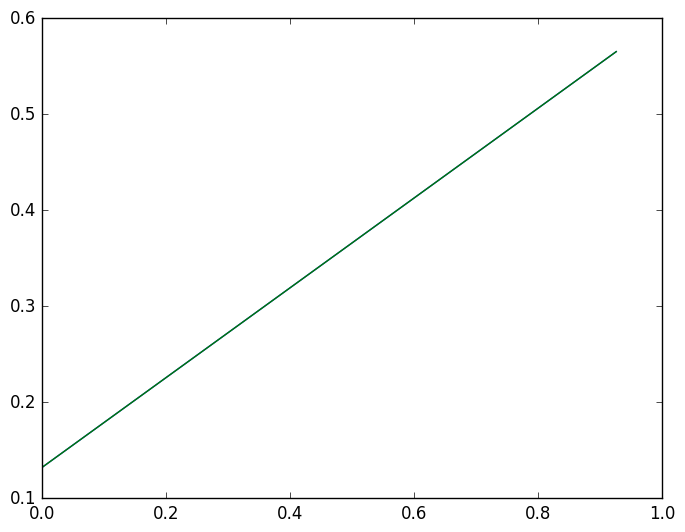

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x332cb42d0>

In [79]:
plot(y_desired_arr,s1)
plot(y_desired_arr,s2)

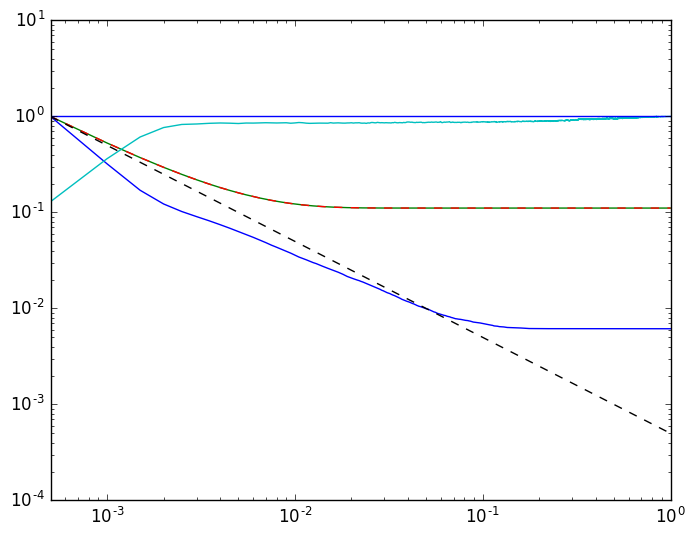

PyObject <matplotlib.lines.Line2D object at 0x32b962190>

In [60]:
loglog(yy,pp)
loglog(yy1,pp1)
loglog(yy2,pp2,"--")
plot(y_arr,y2_arr./y1_arr,label=L"k_2")
# loglog(yy1,pp1)
loglog(yy,1./(N*yy),"--k")
xlim([1/N,1])
axhline(1)

Why does it have this low $y$ behavior? It is _not_ just a function of the initial condition (which would be exactly equal)! Can we theoretically predict this $y_{1,2}$ behavior and plug it into the theory?

Something like: if we had our infected on the high $k$ nodes, then we would likely infect other nodes (10 times faster!) and thus would leave the state faster. (mean time in the state times the probability of having that combination of k's)

Mean time in the state = (birth rate + death rate)

$$T = k*p_{birth} + p_{death}$$

$$p_{birth} = \sum_{k} p_{k,neighbor} \frac{1}{k} (1 + \frac{1}{k} \alpha)$$

$$p_{death} = (1 + \beta)$$

Thus $T$ drops with higher $k$ and we spend less time, and thus the ensemble average is reduced for those $y$. However, for higher $y$ entropic effects dominate (it is unlikely to have a significant fraction of infecteds in a given state and thus the effect of time in the state is less).

Check also whether the higher $y$ part of the solution agrees with the equilibrium theory.

In [57]:
k_range = get_k_range(N)
k1,k2 = k_range[p_k .> 0]
k1,k2

(k2 + 1) / (k1 + 1)

17.0

We see that the two degree simulation captures the dynamics at least qualitatively.


Look at the distribution of $n1$ and $n2$ as a function of $y$

The probability of having $n_2$ be high is first low (of course, because the first node is likely to be $n_1$, and then rises to be $n_2$).

can we use the diffusion equation to find the average $n_1$ and $n_2$ conditioned on reaching that $y$, and then develop an effective $s$ based on those distributions of $n_1$ and $n_2$?

How do we maybe solve for the average $n_1$ and $n_2$??


Maybe I need to condition on non-extinction but then observe the $y_{1/2}$ distribution for $y$ _below_ the current $y$! Maybe the distribution has equalized out by the time we look at it, but it was uneven before!


Other questions
- what do we do with this?
- Can we solve the 2D diffusion equation to get expressions for p_reach, etc?
- What are the orthogonal directions?
- Try this on larger simulation data sets, quantitatively